In [1]:
import cmaps
from eofs.standard import Eof
import netCDF4 as nc
import numpy as npy
import matplotlib.pyplot as plt
from mpl_toolkits.basemap  import Basemap
from matplotlib import cm
import pandas as pd

from utils.const import ROOT, FILE_NAME, LONS, LATS
from utils.func import convert_date, plot_to_map
from utils.func import csv_to_masked_array as ctm

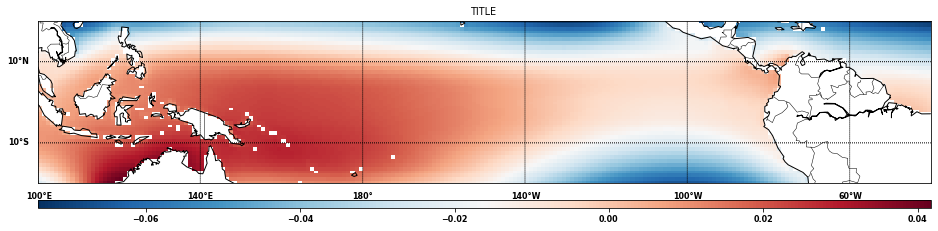

In [2]:
year_ssh = ctm("./season_average/winter/1992.csv")
for i in range(1993, 2017):
    y = ctm("./season_average/winter/{}.csv".format(i))
    year_ssh = npy.ma.append(year_ssh, y, axis=0)
year_ssh.shape

plot_to_map(LONS, LATS, year_ssh.sum(axis=0)/(2018-1992+1), set_cmaps="RdBu_r")

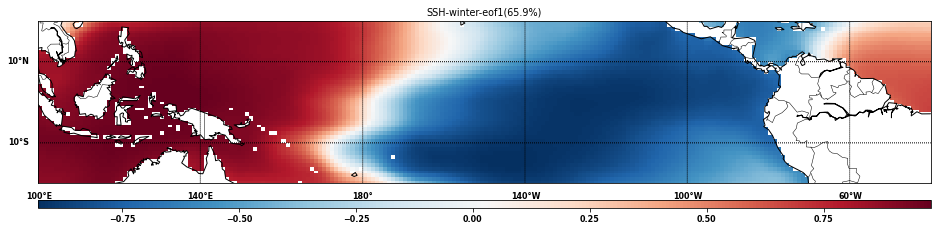

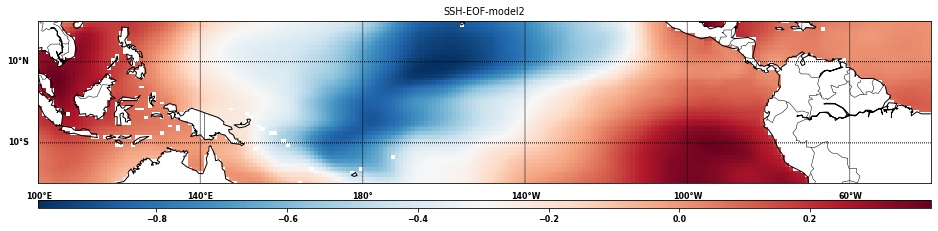

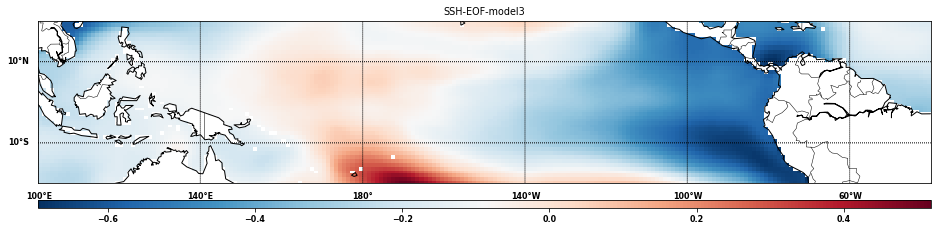

In [9]:
coslat = npy.cos(npy.deg2rad(LATS))
wgts = npy.sqrt(coslat)[..., npy.newaxis]

solver = Eof(year_ssh, weights=wgts)

eof = solver.eofsAsCorrelation(neofs=3)
pc = solver.pcs(npcs=3, pcscaling=1)
var = solver.varianceFraction()

plot_to_map(LONS, LATS, eof[0,:,:], fig_title="SSH-winter-eof1(65.9%)", set_cmaps="RdBu_r")
plot_to_map(LONS, LATS, eof[1,:,:], fig_title="SSH-EOF-model2", set_cmaps="RdBu_r")
plot_to_map(LONS, LATS, eof[2,:,:], fig_title="SSH-EOF-model3", set_cmaps="RdBu_r")

In [4]:
var

array([6.59588609e-01, 1.23718146e-01, 6.29182515e-02, 4.16483733e-02,
       2.59026025e-02, 1.97991151e-02, 1.49656459e-02, 8.96231668e-03,
       7.45476585e-03, 6.48442232e-03, 5.30234844e-03, 4.78556777e-03,
       4.04608110e-03, 3.07451375e-03, 2.20407584e-03, 2.15311118e-03,
       1.81145294e-03, 1.25181409e-03, 9.69761956e-04, 8.92304168e-04,
       6.70809318e-04, 5.84894626e-04, 4.59625414e-04, 3.51391323e-04,
       2.32802179e-31])

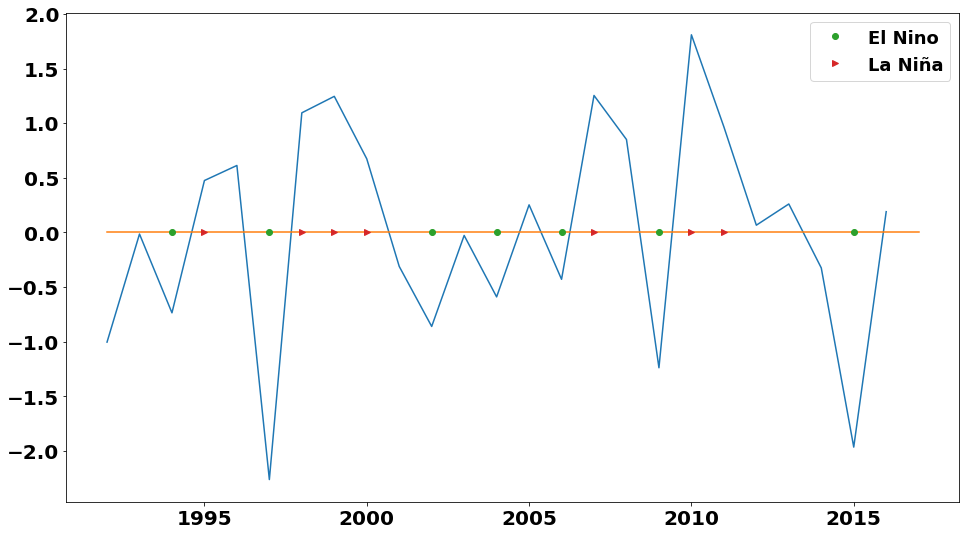

In [15]:
plt.figure(figsize=(16,9))
plt.xticks(size = 20)
plt.yticks(size = 20)
# plt.plot(npy.arange(1992, 2017), pc[:,0], "+-")
plt.plot(npy.arange(1992, 2017), pc[:,0])
plt.plot([1992, 2017], [0,0])
plt.plot([1994, 1997, 2002, 2004, 2006, 2009, 2015], [0,0,0,0,0,0,0], 'o', label="El Nino")
plt.plot([1995, 1998, 1999, 2000, 2007, 2010, 2011], [0,0,0,0,0,0,0], ">", label="La Niña")
plt.legend(fontsize=18)
# plt.plot(npy.array([1994,1995,2002,2003,2004,2005,2009,2010]), [0.1,0,0.1,0,0.1,0,0.1,0], "bo")
# plt.plot(npy.array([1997,1998,2006,2007,2015,2016]), [0.1,0,0.1,0,0.1,0], "ro")
# plt.plot(npy.array([1995,1996,2000,2000,2008,2008,2010,2011]), -npy.array([0.1,0,0.1,0,0.1,0,0.1,0]), "r>")
# plt.plot(npy.array([2001,2001,2011,2012]), -npy.array([0.1,0,0.1,0]), "b>")

In [6]:
pc[:,0]

array([-1.00318762, -0.01425057, -0.73511621,  0.47548067,  0.61314037,
       -2.26075622,  1.09490298,  1.24564134,  0.67402784, -0.3103801 ,
       -0.85976874, -0.02719216, -0.5893381 ,  0.25290076, -0.42839589,
        1.25375321,  0.85077084, -1.23778816,  1.80882442,  0.96674592,
        0.06676005,  0.26074703, -0.32428445, -1.96367113,  0.19043392])